# **Install necessary packages**

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=caad0fb183be8898f83048310721a0ac426e6fa78c702ee1d73fa4c1fc5a7db3
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract


# **Import packages**

In [ ]:
# Import all necessary packages
import pandas as pd

In [ ]:
import cv2
import imutils
import numpy as np
import pytesseract

In [ ]:
# Mount your local Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Model**

In [ ]:
img = cv2.imread('/content/drive/My Drive/Colab_Notebooks/pictures/Romania_foto_1.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )

In [ ]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def compute_skew(src_img):

    if len(src_img.shape) == 3:
        h, w, _ = src_img.shape
    elif len(src_img.shape) == 2:
        h, w = src_img.shape
    else:
        print('upsupported image type')

    img = cv2.medianBlur(src_img, 3)

    edges = cv2.Canny(img,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 30, minLineLength=w / 4.0, maxLineGap=h/4.0)
    angle = 0.0
    nlines = lines.size

    #print(nlines)
    cnt = 0
    for x1, y1, x2, y2 in lines[0]:
        ang = np.arctan2(y2 - y1, x2 - x1)
        #print(ang)
        if math.fabs(ang) <= 30: # excluding extreme rotations
            angle += ang
            cnt += 1

    if cnt == 0:
        return 0.0
    return (angle / cnt)*180/math.pi

def deskew(src_img):
    return rotate_image(src_img, compute_skew(src_img))

In [ ]:
# if __name__ == '__main__':
#     import cv2
#     img = cv2.imread('test.png')
#     corrected_img = deskew(img)

In [ ]:
test = deskew(img)

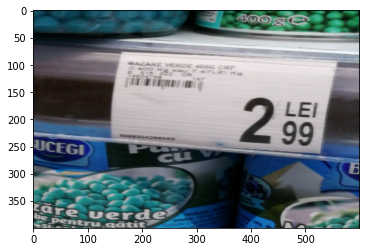

In [ ]:
plt.imshow(img);

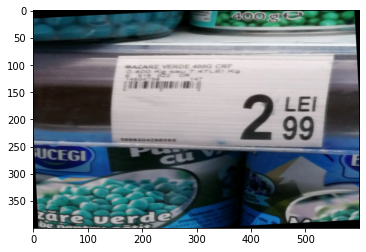

In [ ]:
plt.imshow(test)
plt.show()

In [ ]:
import cv2
import imutils
import numpy as np
import pytesseract

In [ ]:
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

In [ ]:
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15)

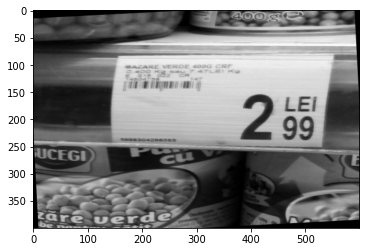

In [ ]:
plt.imshow(gray, cmap="gray")
plt.show()

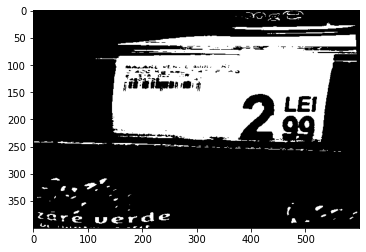

In [ ]:
thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap="gray")
plt.show()

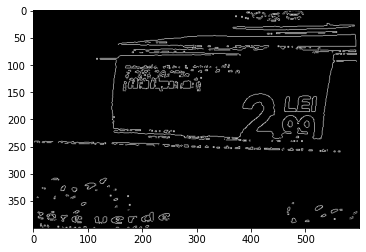

In [ ]:
edged = cv2.Canny(thresh, 30, 200) 
plt.imshow(edged, cmap="gray")
plt.show()

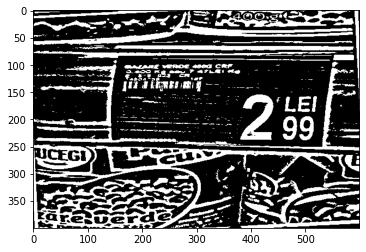

In [ ]:
gray_1 = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
        
# black-white adaptive mean converting
thresh_1 = cv2.adaptiveThreshold(gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,15,5)


plt.imshow(thresh_1, cmap="gray")
plt.show()

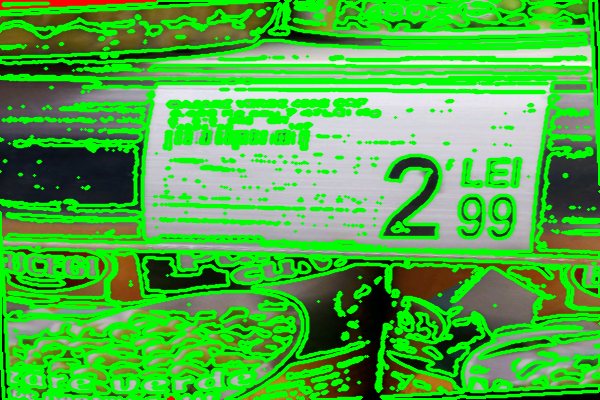

In [ ]:
# finding picture contours via Canny edge detection 
dst = cv2.Canny(thresh_1, 100, 300)

contours, hierarchy = cv2.findContours(image=thresh_1, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

                                      
image_copy = test.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# cv2.imshow('None approximation', image_copy)
# plt.imshow(image_copy)
# plt.show()

cv2_imshow(image_copy)

In [ ]:
    img_blur = cv2.medianBlur(src_img, 3)

    edges = cv2.Canny(img,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)
    lines = cv2.HoughLinesP(edges, 1, math.pi/180, 30, minLineLength=w / 4.0, maxLineGap=h/4.0)
    angle = 0.0
    nlines = lines.size

In [ ]:
img_blur = cv2.medianBlur(test, 3)
edges = cv2.Canny(img_blur,  threshold1 = 30,  threshold2 = 100, apertureSize = 3, L2gradient = True)

img_blur = cv2.drawContours(test, edges, -1, (0, 0, 255), 3)

cv2_imshow(img_blur)

error: ignored

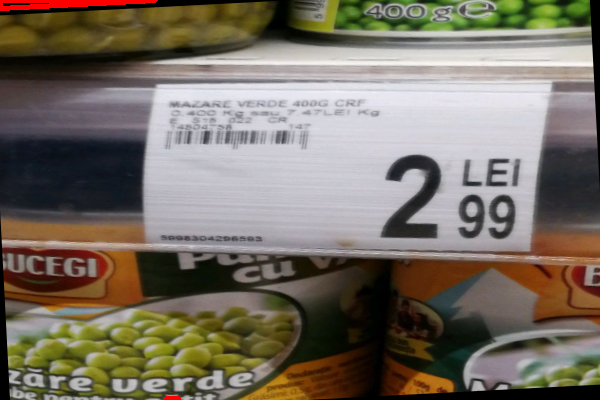

In [ ]:
contours_sizes= [(cv2.contourArea(cnt), cnt) for cnt in contours]
biggest_contour = max(contours_sizes, key=lambda x: x[0])[1]

countours = biggest_contour

for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    screenCnt = approx

test_2 = cv2.drawContours(test, [screenCnt], -1, (0, 0, 255), 3)

# plt.imshow(test_2)
# plt.show()

cv2_imshow(test_2)

In [ ]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)

    # if our approximate has 4 points, then
    # we have assume that we have found our price tag
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    test_1 = cv2.drawContours(test, [screenCnt], -1, (0, 0, 255), 3)

In [ ]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

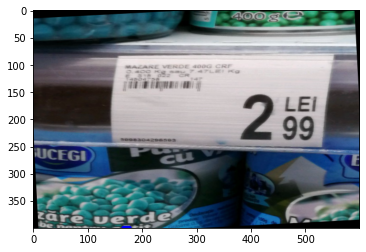

In [ ]:
plt.imshow(test_1)
plt.show()

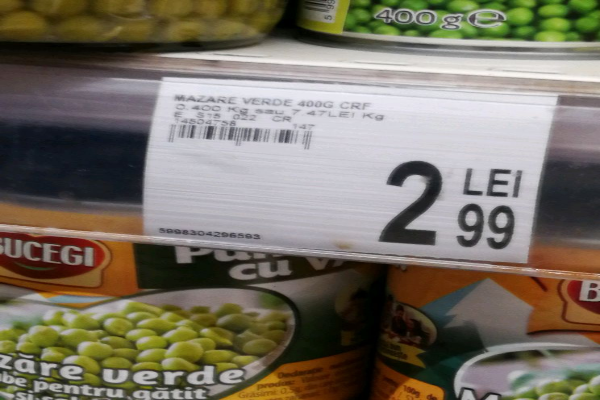

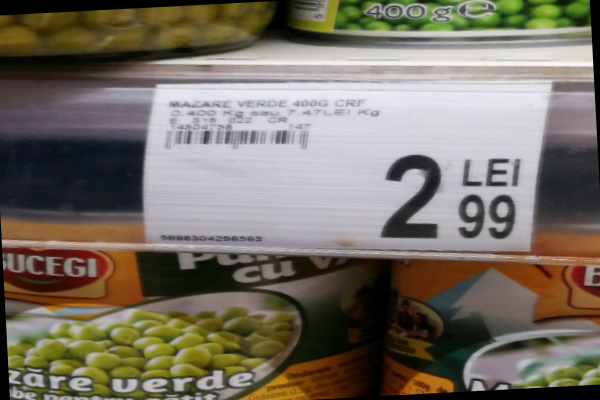

(None, None)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(test)

# **MobileNet V2**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
model.save('model_mask_FACE', save_format = "h5")
model_mask = tf.keras.models.load_model('model_mask_FACE)

In [ ]:
frame = cv2.cvtColor(cv2.imread(‘house.png'), cv2.COLOR_BGR2RGB)
frame_image = Image.fromarray(frame)
boxes, probs, landmarks = mtcnn.detect(frame_image, landmarks = True)
x1, y1, x2, y2 = [int(bx) for bx in boxes[0]]
image = Image.fromarray(frame[y1:y2, x1:x2]).resize((224,224))
face = img_to_array(image)

In [ ]:
face = preprocess_input(face)
face = np.expand_dims(face, axis=0)

In [ ]:
(mask, withoutMask) = model_mask.predict(face)[0]
image = cv2.imread(‘house.png’)

In [ ]:
if mask > withoutMask and max(mask, withoutMask) > 0.8: # уверенность
    label = "Mask" if mask > withoutMask else "No Mask"
    color = (0, 122, 0) if label == "Mask" else (0, 0, 122)
    label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
    cv2.putText(image, label, (x1, y1 - 10),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 5)
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 5) 
    y = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Crop right location into necessary location
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

In [ ]:
# Part with text recognition
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)

In [ ]:
# Part with imgages before and after
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)

In [ ]:
# Close windows
cv2.waitKey(0)
cv2.destroyAllWindows()